# Web Scraping

The point of this exercise is to demonstrate that I can use Python to collect, clean and gather insight from data. I used www.alfred.is which is an Icelandic website for job listings. 

I used Chromedriver to connect to the website and BeautifulSoup to sort through the HTML. 

**Step 1:** Open the front page, go through the HTML and collect the links for all of the open jobs. There were over a thousand links, but I printed the first ten below.

In [5]:
# Created on Wed Oct 19 
# @author: andri
    
# Collect all links to open position on the front page 
# We need to scroll all the way down to see all of the content, see in more detail here: https://stackoverflow.com/questions/21006940/how-to-load-all-entries-in-an-infinite-scroll-at-once-to-parse-the-html-in-pytho

import pandas as pd
import numpy as np

import time
from time import strftime
from time import gmtime

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from pprint import pprint

import warnings
warnings.filterwarnings('ignore')


# Start by downloading Chromedriver. See which version you need under setting on your Crhome browser
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")
options.add_experimental_option("useAutomationExtension", False)
options.add_experimental_option("excludeSwitches",["enable-automation"])
options.add_argument('--ignore-ssl-errors=yes')
options.add_argument('--ignore-certificate-errors')
browser = webdriver.Chrome("C:/Users/andri/OneDrive/Desktop/Starfagreining/chromedriver",  chrome_options=options)


browser.get('https://alfred.is/')
time.sleep(1)

elem = browser.find_element(By.TAG_NAME,"body")

# Choose the number of times to scroll to get all of the content on the page
# Scrolling too often does not effect the result, it just takes a little bit longer
no_of_pagedowns =  300

while no_of_pagedowns:
    elem.send_keys(Keys.PAGE_DOWN)
    time.sleep(0.2)
    no_of_pagedowns-=1

# Note that the HTML-tag logic in this code might need to be adjusted 
#  if the company makes big changes to their website
page = browser.page_source
page_storf = page[page.find(">ÖLL STÖRF<"):]
browser.quit()
soup = BeautifulSoup(page_storf, 'html.parser')

urls = []
for link in soup.find_all('a'):
    #print(link.get('href'))
    urls.append('https://www.alfred.is' +  str(link.get('href')))

# Print first ten URL's
pprint(urls[0:10])

['https://www.alfred.is/starf/fristundaleidbeinendur-i-hoerduvallaskola-1',
 'https://www.alfred.is/starf/leidbeinandi-a-vinnustofu-i-gardyrkju-a-solheimum-2',
 'https://www.alfred.is/starf/verkefnastjori-velaverkfraedingur',
 'https://www.alfred.is/starf/heilsuleikskolinn-baejarbol-auglysir-eftir-leikskolakennara-1',
 'https://www.alfred.is/starf/taeknimadur-i-taeknideild-3',
 'https://www.alfred.is/starf/heilsuleikskolinn-baejarbol-auglysir-eftir-leikskolaserkennar',
 'https://www.alfred.is/starf/vid-leitum-ad-skapandi-starfsmanni',
 'https://www.alfred.is/starf/serfraedingur-a-upplysingataeknisvidi-2',
 'https://www.alfred.is/starf/soelustjori-lagnaefnis-byko-selfossi',
 'https://www.alfred.is/starf/forfallakennari-setbergsskoli-2']


**Step 2:** Open each of the links, go through the HTML and pick up to the tags associated with each job. I was interested in the company name, job type, job labels, location, competences and industry/profession. I also checked whether or not the ad mentioned anything about remote work.

If you try running the code yourself you'll notice that it takes a long time. I added a lag before opening each link so the website would be less likely to accuse me of being a robot (which I technically am though). Then I print out the total number of links vs how I have gotten.

In [11]:
# Now we can open each of the links to gather information about each job listing

start_time = time.time()
urls = np.unique(urls)

joblist = []
i = 0

#for u in urls[1:40]: 
for u in urls:  
    if u not in ['https://www.alfred.is/', 'https://www.alfred.is/laus-storf', 'https://www.alfred.is/vinnustadir', 'https://www.alfred.is/namskeid', 'https://www.alfred.is/appid', 'https://www.alfred.is/blogg', 'https://www.alfred.isNone', 'https://www.alfred.ishttp://adstod.alfred.is',
 'https://www.alfred.is/um-alfred', 'https://www.alfred.is/fyrirtaeki', 'https://www.alfred.isNone', 'https://www.alfred.ishttps://umsjon.alfred.is', 'https://www.alfred.ishttps://namskeid.alfred.is', 'https://www.alfred.isNone', 'https://www.alfred.is/', 'https://www.alfred.isNone']:
        i = i + 1
        print( "Link no:" + str(i) + "/" + str(len(urls)) )
        options = webdriver.ChromeOptions()
        #options.add_argument("--start-maximized")
        #options.add_experimental_option("useAutomationExtension", False)
        #options.add_experimental_option("excludeSwitches",["enable-automation"])
        options.add_argument('--ignore-ssl-errors=yes')
        options.add_argument('--ignore-certificate-errors')
        options.add_argument('--disable_encoding')
        driver = webdriver.Chrome("C:/Users/andri/OneDrive/Desktop/Starfagreining/chromedriver", chrome_options=options)
        try:
            driver.get(u)
            time.sleep(1)
            page = driver.page_source
            driver.minimize_window()
            driver.quit()
            
            page_company = page[page.find('>Upplýsingar</span>')  + len('>Upplýsingar</span>'): page.find('>Starfasíða</span>') ] 
            
            page_jobtype     = page[page.find('Starfstegund')+len('Starfstegund'): page.rfind('>Staðsetning<')]
            
            if(page.find('>Staðsetning<')) != -1:
                page_location= page[page.find('>Staðsetning<')+len('>Staðsetning<'): page.rfind('M7.44709 7.2053L1.84365 12.7949C1.4872 13.1507 0.909287 13.1507 0.553014 12.7949C0.196712 12.4395 0.196712 11.863 0.553014 11.5076L5.51119 6.56164L0.553158 1.61586C0.196856 1.26028 0.196856 0.683855 0.553158 0.328421C0.909461 -0.0271575 1.48735 -0.0271575 1.84379 0.328421L7.44723 5.91813C7.62538 6.09593 7.71436 6.32871 7.71436 6.56161C7.71436 6.79463 7.62521 7.02759 7.44709 7.2053Z')]
            else: ''

            page_competence   = page[page.find(">Hæfni<"):page.find(">Starfsgreingar>")]
            page_profession   = page[page.find(">Starfsgreinar<"):page.find(">Starfsmerkingar<")]
            page_joblabel     = page[page.find(">Starfsmerkingar<"):]
            
            soup_company    = BeautifulSoup(page_company, 'html.parser')
            soup_jobtype    = BeautifulSoup(page_jobtype, 'html.parser')
            soup_location   = BeautifulSoup(page_location, 'html.parser')
            soup_competence = BeautifulSoup(page_competence, 'html.parser')
            soup_joblabel   = BeautifulSoup(page_joblabel, 'html.parser')
            soup_profession = BeautifulSoup(page_profession, 'html.parser')
            soup_remote     = BeautifulSoup(page, 'html.parser') 
         
            companies = soup_company.find('span').text 
            
            #Note: The class definitions may need to be changed if they make changes to the website
            jobtypes = []  
            for hit in soup_jobtype.findAll(attrs={'class' : 'tw-relative tw-inline-flex tw-items-center tw-rounded-md tw-text-sm tw-p-2 tw-border tw-bg-orange-200 tw-border-orange-200 tw-cursor-auto'}): #'tw-py-2.5 tw-px-3.5 tw-inline-flex tw-rounded-xl tw-bg-orange-200 tw-text-black-500'}):
                jobtypes.append(hit.text)
            
            locations = []
            for hit in soup_location.findAll(attrs={'class' : 'tw-flex tw-items-center'}):
                locations.append(hit.text)
                
            competencies = []
            for hit in soup_competence.findAll(attrs={'class' : 'tw-ml-2.5'}):
                competencies.append(hit.text)
            
            joblabels = []
            for hit in soup_joblabel.findAll(attrs={'class' : 'tw-relative tw-inline-flex tw-items-center tw-rounded-md tw-text-sm tw-p-2 tw-border tw-bg-orange-200 tw-border-orange-200 tw-cursor-auto'}):
                joblabels.append(hit.text)
            
            professions = []
            for hit in soup_profession.findAll(attrs={'class' : 'tw-relative tw-inline-flex tw-items-center tw-rounded-md tw-text-sm tw-p-2 tw-border tw-bg-orange-200 tw-border-orange-200 tw-cursor-auto'}):
                professions.append(hit.text)
         
            soup = BeautifulSoup(page, 'html.parser')          

            remotework_list = []       
            for hit in soup.findAll(attrs={'class' : 'JobDetailPage-module__left--1yehs'}):
                 remotework_list.append(hit)
                 
            soup_str = str(remotework_list).lower()
    
            matches = ["fjarvinna", "fjarvinnu", "remote work", "remote job" "home office", "home-office", "homeoffice", "heimavinna", "heimavinnu", "vinna heima", "starf án staðsetningar", "heimaskrifstofa", "heima skrifstofa", "heima-skrifstofa"]
            
            counter = 0
            if any(x in soup_str for x in matches):
                counter +=1
            if counter > 0:
                remotework = 1
            else: remotework = 0
            
            joblist.append([companies, jobtypes, locations, competencies, professions, joblabels, remotework])
            
        except: pass
    
#print(joblist)
print ("Time it took to collect job data: ", strftime("%H:%M:%S", gmtime(time.time() - start_time)), ".")

Link no:1/1082
Link no:2/1082
Link no:3/1082
Link no:4/1082
Link no:5/1082
Link no:6/1082
Link no:7/1082
Link no:8/1082
Link no:9/1082
Link no:10/1082
Link no:11/1082
Link no:12/1082
Link no:13/1082
Link no:14/1082
Link no:15/1082
Link no:16/1082
Link no:17/1082
Link no:18/1082
Link no:19/1082
Link no:20/1082
Link no:21/1082
Link no:22/1082
Link no:23/1082
Link no:24/1082
Link no:25/1082
Link no:26/1082
Link no:27/1082
Link no:28/1082
Link no:29/1082
Link no:30/1082
Link no:31/1082
Link no:32/1082
Link no:33/1082
Link no:34/1082
Link no:35/1082
Link no:36/1082
Link no:37/1082
Link no:38/1082
Link no:39/1082
Link no:40/1082
Link no:41/1082
Link no:42/1082
Link no:43/1082
Link no:44/1082
Link no:45/1082
Link no:46/1082
Link no:47/1082
Link no:48/1082
Link no:49/1082
Link no:50/1082
Link no:51/1082
Link no:52/1082
Link no:53/1082
Link no:54/1082
Link no:55/1082
Link no:56/1082
Link no:57/1082
Link no:58/1082
Link no:59/1082
Link no:60/1082
Link no:61/1082
Link no:62/1082
Link no:63/1082
L

Link no:490/1082
Link no:491/1082
Link no:492/1082
Link no:493/1082
Link no:494/1082
Link no:495/1082
Link no:496/1082
Link no:497/1082
Link no:498/1082
Link no:499/1082
Link no:500/1082
Link no:501/1082
Link no:502/1082
Link no:503/1082
Link no:504/1082
Link no:505/1082
Link no:506/1082
Link no:507/1082
Link no:508/1082
Link no:509/1082
Link no:510/1082
Link no:511/1082
Link no:512/1082
Link no:513/1082
Link no:514/1082
Link no:515/1082
Link no:516/1082
Link no:517/1082
Link no:518/1082
Link no:519/1082
Link no:520/1082
Link no:521/1082
Link no:522/1082
Link no:523/1082
Link no:524/1082
Link no:525/1082
Link no:526/1082
Link no:527/1082
Link no:528/1082
Link no:529/1082
Link no:530/1082
Link no:531/1082
Link no:532/1082
Link no:533/1082
Link no:534/1082
Link no:535/1082
Link no:536/1082
Link no:537/1082
Link no:538/1082
Link no:539/1082
Link no:540/1082
Link no:541/1082
Link no:542/1082
Link no:543/1082
Link no:544/1082
Link no:545/1082
Link no:546/1082
Link no:547/1082
Link no:548/10

Link no:972/1082
Link no:973/1082
Link no:974/1082
Link no:975/1082
Link no:976/1082
Link no:977/1082
Link no:978/1082
Link no:979/1082
Link no:980/1082
Link no:981/1082
Link no:982/1082
Link no:983/1082
Link no:984/1082
Link no:985/1082
Link no:986/1082
Link no:987/1082
Link no:988/1082
Link no:989/1082
Link no:990/1082
Link no:991/1082
Link no:992/1082
Link no:993/1082
Link no:994/1082
Link no:995/1082
Link no:996/1082
Link no:997/1082
Link no:998/1082
Link no:999/1082
Link no:1000/1082
Link no:1001/1082
Link no:1002/1082
Link no:1003/1082
Link no:1004/1082
Link no:1005/1082
Link no:1006/1082
Link no:1007/1082
Link no:1008/1082
Link no:1009/1082
Link no:1010/1082
Link no:1011/1082
Link no:1012/1082
Link no:1013/1082
Link no:1014/1082
Link no:1015/1082
Link no:1016/1082
Link no:1017/1082
Link no:1018/1082
Link no:1019/1082
Link no:1020/1082
Link no:1021/1082
Link no:1022/1082
Link no:1023/1082
Link no:1024/1082
Link no:1025/1082
Link no:1026/1082
Link no:1027/1082
Link no:1028/1082
Li

**Step 3:** Create a dataset that I can work with.

I printed the first rows of the dataset I created below. Then I tallied up the number of job listings by industry. 
Note that if you add these number together they will be higher than the total number of jobs. That is because a job can have more than one industry label. In that case, it would count in both/all of the categories.

In [22]:
# Move the results into a Pandas DataFrame

a=[el[0] for el in joblist]
b=[el[1] for el in joblist]
c=[el[2] for el in joblist]
d=[el[3] for el in joblist]
e=[el[4] for el in joblist]
f=[el[5] for el in joblist]
g=[el[6] for el in joblist]

df_jobs = pd.DataFrame( list(zip(a,b,c,d,e,f,g)), columns = ["Company", "JobType", "Location", "Competency", "Profession", "JobLabel", "RemoteWork"])

# Note: some jobs can be listed as belonging to more than one profession
# so we need to expand to get one profession per row

# convert the lists in the column into strings
df_jobs['Profession'] = df_jobs['Profession'].apply(lambda x: ', '.join(x))
df_jobs['JobType'] = df_jobs['JobType'].apply(lambda x: ', '.join(x))
df_jobs['Location'] = df_jobs['Location'].apply(lambda x: ', '.join(x))
df_jobs['Competency'] = df_jobs['Competency'].apply(lambda x: ', '.join(x))
df_jobs['JobLabel'] = df_jobs['JobLabel'].apply(lambda x: ', '.join(x))

df_professions = df_jobs.assign(Profession=df_jobs.Profession.str.split(',')).explode('Profession')
df_professions['Profession'] = df_professions['Profession'].apply(lambda x: x.strip())
    
# Count each profession
df_count_professions = pd.DataFrame(df_professions['Profession'].value_counts()  ) 
df_count_professions = df_count_professions.reset_index()
df_count_professions = df_count_professions.rename(columns={'Profession': 'Frequency', 'index': 'Profession'})
df_count_professions

# Translate the industry names (profession) from Icelandic to English
df_count_professions['Profession'].replace({
        'Stjórnunarstörf': 'Management', 
        'Skrifstofustörf': 'Clerical', 
        'Sérfræðistörf': 'Specialized Work',
        'Kennsla og rannsóknir': 'Education & Research',
        'Iðnaðarstörf': 'Industrial',
        'Sölu- og markaðsstörf': 'Sales & Marketing',
        'Veitingastörf': 'Restaurant Work',
        'Þjónustustörf': 'Service Work',
        'Heilbrigðisþjónusta': 'Healthcare',
        '': 'Unlabeled'
    }, inplace=True)

display(df_jobs.head())
display(df_count_professions)

,Company,JobType,Location,Competency,Profession,JobLabel,RemoteWork
0,Ós ehf.,Fullt starf,Hafnargata 2,,Iðnaðarstörf,"Sjómaður, Vélstjóri",0
1,Fiskkaup hf.,Fullt starf,"Fiskislóð 34-38, 101 Reykjavík",,Iðnaðarstörf,Vélstjóri,0
2,Háskólinn á Akureyri,"Hlutastarf, Sveigjanlegur vinnutími, Umhverfis...","Fiskislóð 34-38, 101 Reykjavík",,"Heilbrigðisþjónusta, Kennsla og rannsóknir","Geðlæknir, Heilbrigðisvísindi, Hjúkrun, Hjúkru...",0
3,Forréttindi,Hlutastarf,"Drekavellir 26, 221 Hafnarfjörður","Hreint sakavottorð, Ökuréttindi",Heilbrigðisþjónusta,"Aðhlynning, Aðstoðarmanneskja, Umönnun, Þjónus...",0
4,Núpur,Hlutastarf,"Núpalind 3, 201 Kópavogur","Jákvæðni, Metnaður, Samvinna",Kennsla og rannsóknir,"Grunnskólakennari, Leikskólakennari, Leiðbeina...",0


,Profession,Frequency
0,Service Work,344
1,Industrial,238
2,Healthcare,204
3,Education & Research,198
4,Specialized Work,177
5,Sales & Marketing,121
6,Restaurant Work,107
7,Management,78
8,Clerical,72
9,Upplýsingatækni,57


**Step 4:** Show the results visually. I only did one simple graph since the point of this exercise was not data visualization. 

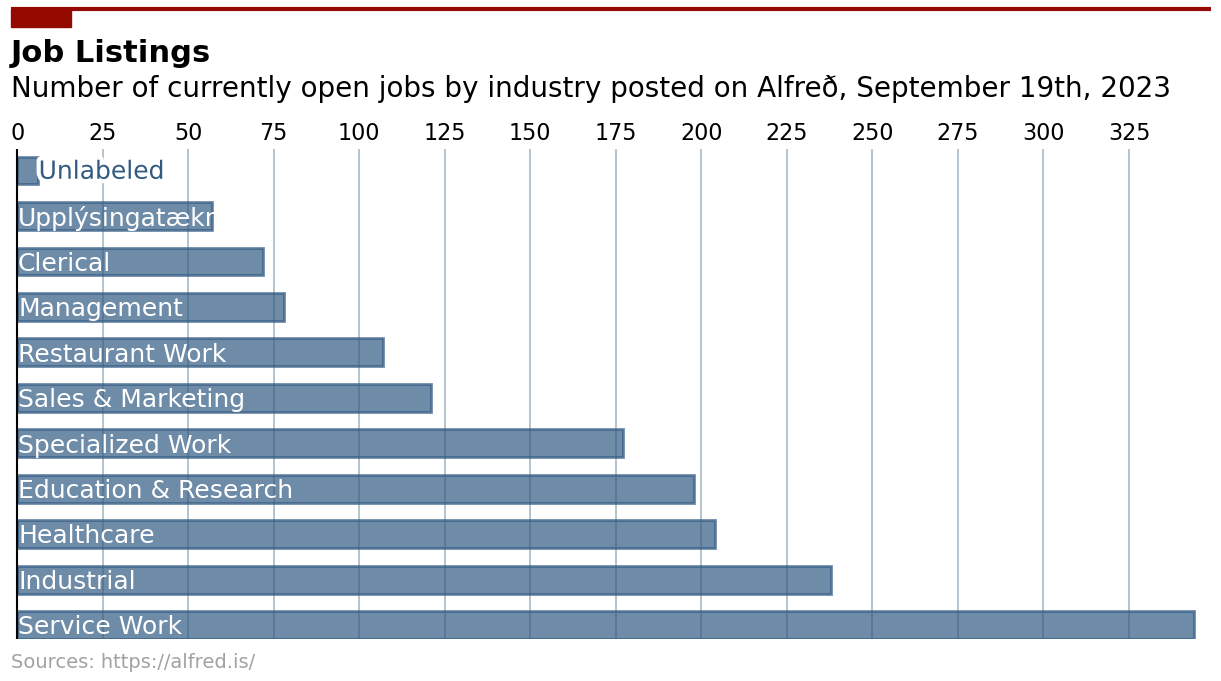

In [18]:
# Plot the numbers by profession
# Economist inspired graph: https://python-graph-gallery.com/web-horizontal-barplot-with-labels-the-economist/ 

import matplotlib.pyplot as plt
from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke



profession = df_count_professions['Profession'].head(12)
frequency = df_count_professions['Frequency'].head(12)
y = [i * 0.9 for i in range(len(df_count_professions))]

max_x = df_count_professions['Frequency'].max() + 5

# The colors
BLUE = "#315a82"
RED = "#940a00"
BLACK = "#202020"
GREY = "#a2a2a2"


fig, ax = plt.subplots(figsize=(12, 7))

ax.barh(y, frequency, height=0.55, align="edge", color=BLUE, alpha=0.7, edgecolor=BLUE, linewidth=2);


ax.xaxis.set_ticks([i * 25 for i in range(0, max_x)])
ax.xaxis.set_ticklabels([i * 25 for i in range(0, max_x)], size=16, fontfamily="sans-serif", fontweight=100)
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)

ax.set_xlim((0, max_x))
ax.set_ylim((0, len(profession) * 0.9 - 0.2))

# Set whether axis ticks and gridlines are above or below most artists.
ax.set_axisbelow(True)
ax.grid(axis = "x", color="#A8BAC4", lw=1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_lw(1.5)
ax.spines["left"].set_capstyle("butt")

# Hide y labels
ax.yaxis.set_visible(False)

PAD = 0.3
for profession, frequency, y_pos in zip(profession, frequency, y):
    x = 0
    color = "white"
    path_effects = None
    if frequency < 20:
        x = frequency
        color = BLUE    
        path_effects=[withStroke(linewidth=6, foreground="white")]
    
    ax.text(
        x + PAD, y_pos + 0.5 / 2, profession, 
        color=color, fontfamily="sans-serif", fontsize=18, va="center",
        path_effects=path_effects
    ) 
    
# Make room on top and bottom
# Note there's no room on the left and right sides
fig.subplots_adjust(left=0.005, right=1, top=0.8, bottom=0.1)

# Add title
fig.text(
    0, 0.925, "Job Listings", 
    fontsize=22, fontweight="bold", fontfamily="sans-serif"
)
# Add subtitle
fig.text(
    0, 0.875, "Number of currently open jobs by industry posted on Alfreð, September 19th, 2023", 
    fontsize=20, fontfamily="sans-serif"
)

# Add caption
source = "Sources: https://alfred.is/"
fig.text(
    0, 0.06, source, color=GREY, 
    fontsize=14, fontfamily="sans-serif"
)

# Add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color=RED, solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color=RED))

# Set facecolor, useful when saving as .png
fig.set_facecolor("white")
fig

#fig.savefig("plot.png", dpi=300)
fig.show()